In [41]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import image_dataset_from_directory

In [84]:
train_ds = image_dataset_from_directory(
    'data/tiled_images/keras',
    batch_size=32,
    subset='training',
    seed=123,
    validation_split=0.3
).map(lambda x, y: (x/255, y))

val_ds = image_dataset_from_directory(
    'data/tiled_images/keras',
    batch_size=32,
    subset='validation',
    seed=123,
    validation_split=0.3
).map(lambda x, y: (x/255, y))

Found 378307 files belonging to 2 classes.
Using 264815 files for training.
Found 378307 files belonging to 2 classes.
Using 113492 files for validation.


In [81]:
# train_ds = image_dataset_from_directory(
#     'data/keras_subset',
#     batch_size=32,
#     subset='training',
#     seed=123,
#     validation_split=0.2
# ).map(lambda x, y: (x/255, y))

# val_ds = image_dataset_from_directory(
#     'data/keras_subset',
#     batch_size=32,
#     subset='validation',
#     seed=123,
#     validation_split=0.2
# ).map(lambda x, y: (x/255, y))

Found 295 files belonging to 2 classes.
Using 236 files for training.
Found 295 files belonging to 2 classes.
Using 59 files for validation.


In [85]:
model1 = keras.models.Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(2),    
    Flatten(),
    Dense(1, activation='sigmoid')
])

es = EarlyStopping(monitor = 'val_loss', patience = 3)
cp = ModelCheckpoint(filepath='model1_checkpoint.keras', monitor='val_acc', save_best_only=True, mode='max', verbose=1)

model1.compile(loss='bce', optimizer='Adam', metrics=['acc'])

In [ ]:
history1 = model1.fit(train_ds, validation_data=val_ds, epochs=5, callbacks=[es, cp])

Epoch 1/5
8276/8276 [==============================] - ETA: 0s - loss: 0.5042 - acc: 0.7611
Epoch 1: val_acc improved from -inf to 0.78648, saving model to model1_checkpoint.keras
8276/8276 [==============================] - 4873s 589ms/step - loss: 0.5042 - acc: 0.7611 - val_loss: 0.4643 - val_acc: 0.7865
Epoch 2/5
8276/8276 [==============================] - ETA: 0s - loss: 0.4360 - acc: 0.8119
Epoch 2: val_acc improved from 0.78648 to 0.82357, saving model to model1_checkpoint.keras
8276/8276 [==============================] - 5577s 674ms/step - loss: 0.4360 - acc: 0.8119 - val_loss: 0.4155 - val_acc: 0.8236
Epoch 3/5
5281/8276 [==================>...........] - ETA: 26:36 - loss: 0.4173 - acc: 0.8241

In [80]:
# The saved model can later be loaded using 
model1 = keras.models.load_model('model1_checkpoint.keras')

In [71]:
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 254, 254, 25)      700       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 127, 127, 25)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 125, 125, 50)      11300     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 62, 62, 50)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 60, 60, 100)       45100     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 30, 30, 100)     

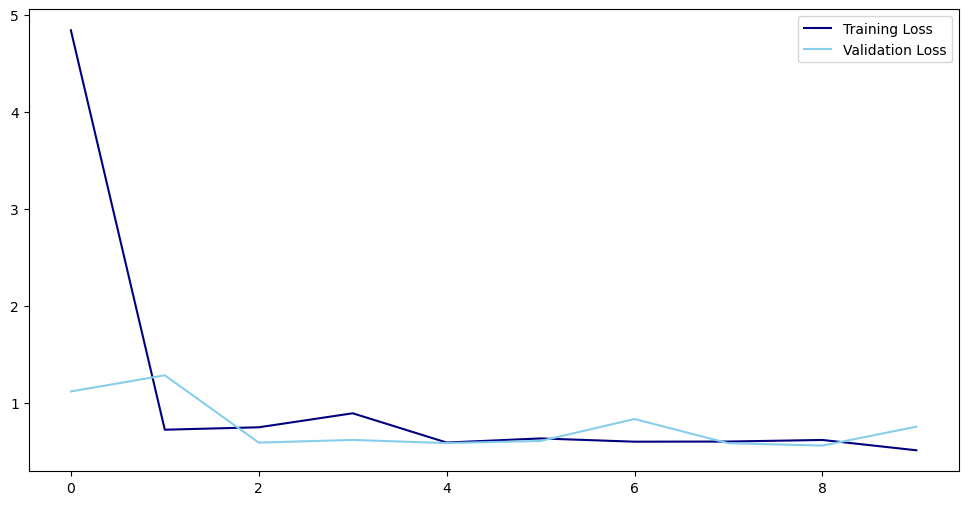

In [35]:
# Check out the plot of loss vs epoch. How's our model?
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], c='navy', label='Training Loss')
plt.plot(history.history['val_loss'], c='skyblue', label='Validation Loss')
plt.legend();